Retrain your model using the above suggestions (be sure to split your data into train/test where appropriate), and deliver a notebook containing a detailed evaluation report listing the metrics listed below, along with your commentary to each:

1. The accuracy of your model on the test data
2. The precision and recall values
3. A classification report (scikit-learn has a function that can create this for you)
4. The confusion matrix for this experiment
5. An ROC curve
6. A Precision/Recall curve

In [24]:
%pylab inline
import matplotlib.pyplot as pl
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
import pandas as pd

fileURL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data'
lens=pd.read_csv(fileURL, names=['ID', 'Age', 'Spectacle_Prescription','astigmatic','tear_production_rate','Classes'],header=None,delim_whitespace=True)
lens = lens[['Age', 'Spectacle_Prescription','astigmatic','tear_production_rate','Classes']]
#-- 3 Classes
#     1 : the patient should be fitted with hard contact lenses,
#     2 : the patient should be fitted with soft contact lenses,
#     3 : the patient should not be fitted with contact lenses.
#convert class 1 and 2 as 1, convert class 3 as 0

lens['Classes'].replace({1:1,2:1,3:0},inplace=True)

train, test= train_test_split(lens,train_size=0.5)

print("training set's length" , len(train))
print("testing set's length", len(test))


Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


training set's length 12
testing set's length 12


In [25]:
lens[:5]

,Age,Spectacle_Prescription,astigmatic,tear_production_rate,Classes
0,1,1,1,1,0
1,1,1,1,2,1
2,1,1,2,1,0
3,1,1,2,2,1
4,1,2,1,1,0


In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
train_features = train[['Age', 'Spectacle_Prescription','astigmatic','tear_production_rate']]
train_target = train[['Classes']]
test_features = test[['Age', 'Spectacle_Prescription','astigmatic','tear_production_rate']]
test_target = test[['Classes']]
clf = clf.fit(train_features, train_target)

In [27]:
train_features[:5]

,Age,Spectacle_Prescription,astigmatic,tear_production_rate
21,3,2,1,2
16,3,1,1,1
4,1,2,1,1
17,3,1,1,2
14,2,2,2,1


In [28]:
train_target[:5]

,Classes
21,1
16,0
4,0
17,0
14,0


In [29]:
test_features
test_target

,Classes
22,0
19,1
2,0
23,0
15,0
6,0
1,1
5,1
3,1
12,0


In [64]:
y_pred = clf.predict(test_features)
y_pred = np.array(y_pred)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [97]:
y_pred_prob = clf.predict_proba(test_features)
y_pred_prob_class1 = y_pred_prob[:, 1]
y_pred_prob_class0 = y_pred_prob[:,0]

In [88]:
#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_target, y_pred)

0.75

The model predicts 75% of testing set correctly, which means out of 12 instances, the sum of TP and TN is 12 * 75% = 9

In [89]:
#calculate precision, recall, fscore
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(test_target, y_pred, average='binary')

(0.7142857142857143, 0.83333333333333337, 0.76923076923076916, None)

Positive predictive value is 0.71 which means out of all the predicted positive instances, 71% are TP. FP rate is about 29%. When a patient is predicted to wear lens, 71% posibility that it is correct. 

And recall is 0.83 which means out of all true positive instances, 83% are predicted correctly.  High recall rate means it is less likely to predict a positive instance as negative class. Among all patients who need lens, 83% of them will be predicted to have lens. 

In [90]:
#calculate and print classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(test_target, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.80      0.67      0.73         6
    class 1       0.71      0.83      0.77         6

avg / total       0.76      0.75      0.75        12



In [91]:
#calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(test_target, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP,TN,FP,FN

(5, 4, 2, 1)

In [92]:
fpr, tpr, thresholds = roc_curve(test_target, y_pred, pos_label = 1)
fpr,tpr,thresholds,len(test_target),len(y_pred)

(array([ 0.        ,  0.33333333,  1.        ]),
 array([ 0.        ,  0.83333333,  1.        ]),
 array([2, 1, 0]),
 12,
 12)

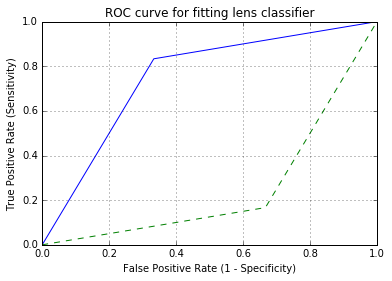

In [98]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds1 = roc_curve(test_target, y_pred_prob_class1)
plt.plot(fpr1, tpr1)
fpr0, tpr0, thresholds0 = roc_curve(test_target, y_pred_prob_class0)
plt.plot(fpr0, tpr0,linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for fitting lens classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)